                                          Hotel booking demand
<br>                                        
  The goal of machine learning in the context of hotel cancellation prediction would be to develop a predictive model that can accurately
forecast the likelihood of a hotel booking being cancelled based on information such as when the booking was made, length of stay, and the number of
of adults, children, and/or babies, and the number of available parking spaces, among other things. <br>
We aim to develop a predictive model that can anticipate reservation cancellations, allowing hotels to allocate their resources more efficiently.
We will study the dataset and the relation between cancellations and other attributes such as type of hotel (city-resort), type of guest (new-repeated).
 

source of the dataset: (https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).


General information about the dataset:




  1-Number of variables :32

2-Number of observations:119390

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


pd.set_option('display.max_columns', None)

In [2]:
hotel_data =pd.read_csv("hotel_bookings.csv")

In [3]:
hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
hotel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

A summary of the dataset including samples of raw dataset, graphs and tables show
variables distribution, missing values and statistical summaries (mean and variance).

In [6]:
# raw dataset
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Cancellation rates in the two types of hotels:

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


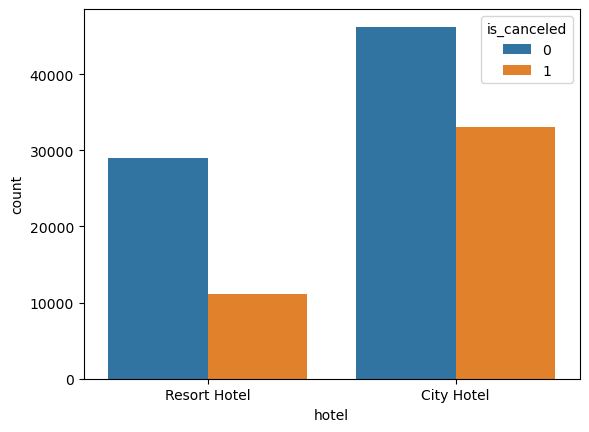

In [7]:
sns.countplot(data=hotel_data, x='hotel', hue='is_canceled')
resort_canceled = hotel_data[(hotel_data['hotel']=='Resort Hotel') & (hotel_data['is_canceled']==1)]
city_canceled = hotel_data[(hotel_data['hotel']=='City Hotel') & (hotel_data['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(hotel_data[hotel_data['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(hotel_data[hotel_data['hotel']=='City Hotel'])))

city hotels have higher cancelation rate than resort hotels

Cancellation rates in the two types of guest (new-old):

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


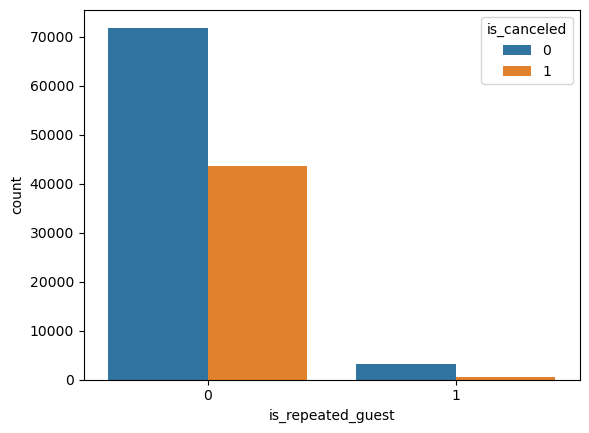

In [8]:
sns.countplot(data=hotel_data, x='is_repeated_guest', hue='is_canceled')
new_guest = hotel_data[(hotel_data['is_repeated_guest']==0) & (hotel_data['is_canceled']==1)]
old_guest = hotel_data[(hotel_data['is_repeated_guest']==1) & (hotel_data['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(hotel_data[hotel_data['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(hotel_data[hotel_data['is_repeated_guest']==1])))

As seen in the correlation table, the above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking. 

<h3> missing values:</h3>

In [9]:
import numpy as np
np.sum(hotel_data.isnull())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<h3> statistical summaries: </h3>

In [10]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


<h3>variance:</h3>

In [11]:
variances = hotel_data.var()
print(variances)

is_canceled                           0.233210
lead_time                         11419.721511
arrival_date_year                     0.500522
arrival_date_week_number            185.099790
arrival_date_day_of_month            77.102966
stays_in_weekend_nights               0.997229
stays_in_week_nights                  3.641554
adults                                0.335543
children                              0.158851
babies                                0.009494
is_repeated_guest                     0.030894
previous_cancellations                0.712904
previous_bookings_not_canceled        2.242317
booking_changes                       0.425503
agent                             12271.000405
company                           17333.042879
days_in_waiting_list                309.574203
adr                                2553.866100
required_car_parking_spaces           0.060168
total_of_special_requests             0.628529
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_14052\4197764327.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = hotel_data.var()


<h2>Data Transformation
</h2>  <h3>normalization:</h3>

because the "adr" attribute has a large scale of data, we will normalization the data in order to scale the data values in a specified range ( 0.0 to 1.0) 

In [12]:
hotel_data['adr'].min


<bound method NDFrame._add_numeric_operations.<locals>.min of 0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64>

In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
name = ['adr']
data_to_normalization = hotel_data[name].values
v_scaled = min_max_scaler.fit_transform(data_to_normalization)
temp = pd.DataFrame(v_scaled,columns=name,index= hotel_data.index)
hotel_data[name]= temp

In [14]:
hotel_data['adr'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0         0.001180
1         0.001180
2         0.015053
3         0.015053
4         0.019307
            ...   
119385    0.018963
119386    0.042877
119387    0.030351
119388    0.020491
119389    0.029147
Name: adr, Length: 119390, dtype: float64>

<h3>discretization:</h3>

we will replace the raw values of total_of_special_requests attribute by 3 levels.
<br> 
1- no special requests, for zero requests.<br>
2- few special requests, from 1 to 3 requests.<br>
3- many special requests, from 4 and more requests.<br> 

In [15]:
hotel_data['total_of_special_requests'] = pd.cut(x = hotel_data['total_of_special_requests'], bins = [0,1,4,8], right = False, labels=[1,2,3])

In [16]:
hotel_data['total_of_special_requests'].head

<bound method NDFrame.head of 0         1
1         1
2         1
3         1
4         2
         ..
119385    1
119386    2
119387    3
119388    1
119389    2
Name: total_of_special_requests, Length: 119390, dtype: category
Categories (3, int64): [1 < 2 < 3]>

<h2>Data cleaning</h2>
1) Finding the number of missing values<br>
Checking how many missing values each column contains


In [17]:
import numpy as np
np.sum(hotel_data.isnull())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

2)To find the indexes of the missing value

Eg. Finding 4 missing value indexes of children column

In [18]:
hotel_data.children[hotel_data.children != hotel_data.children].index.values

array([40600, 40667, 40679, 41160], dtype=int64)

3) Removing the unwanted columns<br>
Usually if more than 70% of values in a column are missing and there is no way to fill in the missing values, then the column can be dropped completely from the dataset. 70% of 110390 is 83573


In [19]:
for col in hotel_data.columns:
    if np.sum(hotel_data[col].isnull())>(hotel_data.shape[0] * 0.7):
        hotel_data.drop(columns=col, inplace=True, axis=1)
print(hotel_data.shape)

(119390, 31)


In [20]:
hotel_data.shape


(119390, 31)

5)Filling the missing values of columns

First let us fill the children column Here we have used mean as a value to be replaced with missing values As mean can be a float, we have taken the lowest nearest integer using the floor method

In [21]:
hotel_data["children"].fillna(value = hotel_data["children"].mean(), inplace=True)
hotel_data["children"] = hotel_data["children"].apply(np.floor)
print(f"Total missing values in children column after filling = {np.sum(hotel_data.children.isnull())}")

Total missing values in children column after filling = 0


Checking if the columns contain any null value

In [22]:
np.sum(hotel_data.isnull())

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


<h1><center> phase 2<h1>

<h5>First of all, we are preparing data for modling: 

In [23]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
hotel_data.arrival_date_month = hotel_data.arrival_date_month.map(month_map).astype(int)


In [24]:
hotel_data['arrival_date'] = hotel_data['arrival_date_year'].astype(str)+'-'+hotel_data['arrival_date_month'].astype(str)+'-'+hotel_data['arrival_date_day_of_month'].astype(str)

In [25]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

hotel_data['change_in_room'] = hotel_data.apply(roomChange, axis=1)


In [26]:

hotel_data['children'] =hotel_data['children'].fillna(0)

hotel_data['offspring'] = (hotel_data['children'] +hotel_data['babies']).astype(int)

hotel_data['total_bookings'] = hotel_data['previous_cancellations'] + hotel_data['previous_bookings_not_canceled']

hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)

hotel_data['agent'].fillna(hotel_data['agent'].mode()[0], inplace=True)



In [27]:
for i in range(len(hotel_data)):
    if hotel_data.loc[i, 'country'] == 'PRT':
        hotel_data.at[i, 'country'] = 1
    elif hotel_data.loc[i, 'country'] == 'GBR':
       hotel_data.at[i, 'country'] = 2
    else:
        hotel_data.at[i, 'country'] = 0

In [28]:
hotel_data['reservation_status_date'] = pd.to_datetime(hotel_data['reservation_status_date'])
hotel_data['arrival_date'] = pd.to_datetime(hotel_data['arrival_date'])
hotel_data['stay_duration'] = hotel_data['reservation_status_date'] - hotel_data['arrival_date']
hotel_data['stay_duration'] = hotel_data['stay_duration'] / np.timedelta64(1, 'D')
hotel_data['stay_duration'] = hotel_data['stay_duration'].astype(int)

In [29]:
for i in range(len(hotel_data)):
    if hotel_data.loc[i, 'stay_duration']<0:
        hotel_data.at[i, 'stay_duration'] = -1
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    hotel_data[item] = lb.fit_transform(hotel_data[item])
df = pd.get_dummies(hotel_data, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [30]:
 hotel_data.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)


Splitting the data into training set and testing set:<br>
the trining set = 70% of the dataset<br>
the testing set = 30% of the dataset

In [31]:
train_var = hotel_data.drop(['is_canceled'], axis=1)
test_var = hotel_data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.30)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((83573, 29), (83573,), (35817, 29), (35817,))

Text(0.5, 1.0, 'Testing Dataset')

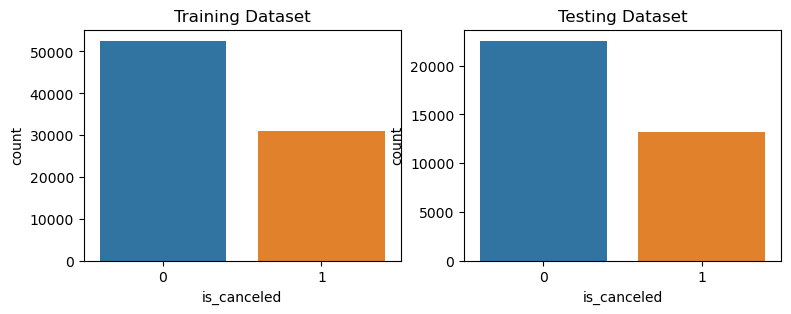

In [32]:
_, ax = plt.subplots(1, 2, figsize=(9, 3))
sns.countplot(x=y_train, ax=ax[0]) 
ax[0].set_title("Training Dataset") 
sns.countplot (x=y_test, ax=ax[1]) 
ax[1].set_title("Testing Dataset")

In [33]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [34]:
#Importing some needed metrics for evaluating the models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


We chooes two supervised machine learning algorithms:<br>
1-Logistic Regression<br>
2-Decision Tree

In [35]:
#Logistic Regression
from sklearn.metrics import classification_report
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))
clf_report =classification_report(y_test, logreg_pred)
print(f"Classification Report : \n{clf_report}")

Test accuracy: 0.992
F1 score: 0.989
[[22548    27]
 [  272 12970]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22575
           1       1.00      0.98      0.99     13242

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817



In [36]:
#Decision Tree

tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))
clf_report = classification_report(y_test, logreg_pred)
print(f"Classification Report : \n{clf_report}")

Test accuracy: 0.993
F1 score: 0.991
[[22340   235]
 [    0 13242]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22575
           1       1.00      0.98      0.99     13242

    accuracy                           0.99     35817
   macro avg       0.99      0.99      0.99     35817
weighted avg       0.99      0.99      0.99     35817



<bold>confusion matrix:<bold>

True Positive (TP): The model predicted Demented '1', and it is true Demented.

True Negative (TN): The model predicted Nondemented '0', and it is true Demented.

False Positive (FP): The model predicted Demented '1', and it is false, it is Nondemented.

False Negative (FN): The model predicted Nondemented '0', and it is false, it is Nondemented.

Text(573.2222222222222, 0.5, 'Actual Labels')

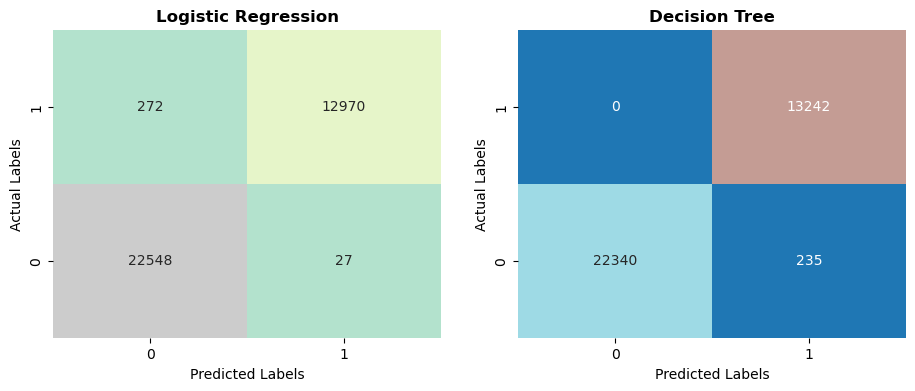

In [37]:
LR_matrix = confusion_matrix(y_test, logreg_pred)
DT_matrix = confusion_matrix(y_test, tree_pred)
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
sns.heatmap(LR_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Logistic Regression", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DT_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')


<h3>Comparison and discussion about The Logistic Regression and Decicion Tree algorithms on hotel-booking-demand dataset</h3>

-------------------------------------------------------------------------------------------------------------

In [38]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier'],
    'Score' : [logreg.score(X_test_mm, y_test), tree.score(X_test, y_test) ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.993439
0,Logistic Regression,0.991652


The Decision Tree achieved a slightly higher accuracy of 0.994249 compared to the Logistic Regression's accuracy of 0.989698.<br>
Looking at the confusion matrices, we can see that the  Decision Tree did not make any false negative predictions at all. Besides, the Decision Tree misclassified 206 instances, while Logistic Regression misclassified 396 instances.<br>
Based on the information above, the Decision Tree can make better predictions.<br>
In terms of interpretability, Logistic Regression is a linear model and may be easier to interpret compared to the Decision Tree, which is a non-linear model that can capture complex relationships between features. However, the Decision Tree may be more computationally expensive compared to the Logistic Regression, especially for large datasets.